# Example - Plots for the application note

This example features code to reproduce plots featured in the figure of the application note, that are not included in the other example notebooks. For a proper introduction to the package, please take a look at `Example-Standard_Workflow.ipynb` instead.

### Data Import

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm
from scipy.stats import spearmanr
import numpy as np
import pandas as pd
import deconomix
from tqdm.notebook import tqdm

In [3]:
# Set global style parameters
plt.rcParams.update({
    'font.size': 14,                 # Global font size
    'axes.titlesize': 16,            # Title font size
    'axes.labelsize': 14,            # Axis label font size
    'xtick.labelsize': 12,           # X-tick label font size
    'ytick.labelsize': 12,           # Y-tick label font size
    'legend.fontsize': 12,           # Legend font size
    'figure.figsize': (5, 4),        # Figure size
    'axes.linewidth': 1.2,           # Line width for axes
    'grid.linewidth': 0.5,           # Line width for grid lines
    'grid.color': 'gray',            # Grid line color
    'legend.frameon': True,         # No frame for legend
    'axes.grid': False,               # Enable grid
    'grid.alpha': 0.5,
    'savefig.bbox' : 'tight',
    'savefig.pad_inches' : 0.05,
    'font.family' : 'sans-serif',
    'mathtext.fontset' : 'dejavusans'})

In [4]:
test, train = deconomix.utils.load_example()

Raw data already downloaded
Importing Data to Python ...
Using cached, preprocessed data
Done


In [5]:
X_ref, Y_mat, C_mat = deconomix.utils.simulate_data(train.drop("B", axis=1), n_mixtures = 1000, n_cells_in_mix = 100)
X_test , Y_test, C_test  = deconomix.utils.simulate_data(test, n_mixtures = 1000, n_cells_in_mix = 100)

### Visualization of exemplary reference and hidden profiles

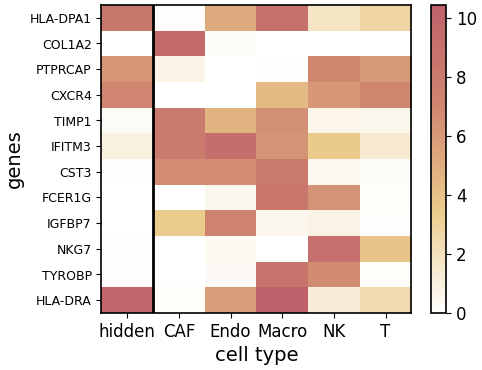

In [34]:
plt.figure()
from matplotlib.colors import LinearSegmentedColormap

# Define a linear colormap from white (low) to #5e81ac (high)
cmap_white_blue = LinearSegmentedColormap.from_list("white_to_blue", ["#ffffff", "#ebcb8b","#d08770", "#bf616a"])

plt.imshow(X_test.iloc[0:12,:], aspect='auto', cmap=cmap_white_blue, interpolation=None, origin="lower")
plt.xticks(range(6), labels=["hidden", "CAF", "Endo", "Macro", "NK", "T"])
plt.yticks(range(12), labels=X_test.index[0:12], rotation=0, size=9);
plt.ylabel("genes")
plt.xlabel("cell type")
plt.axvline(x=0.5, color='black', linewidth=2)
plt.colorbar();
#plt.title("Expression profiles for known celltypes $X$ and hidden profile $x$")
plt.savefig("plots_appnote/png/heatmapXandHidden.png")
plt.savefig("plots_appnote/pdf/heatmapXandHidden.pdf")

### DTD Training Graph

i = 500, loss = -4.854036e+00: 100%|██████████| 500/500 [00:01<00:00, 264.04it/s]


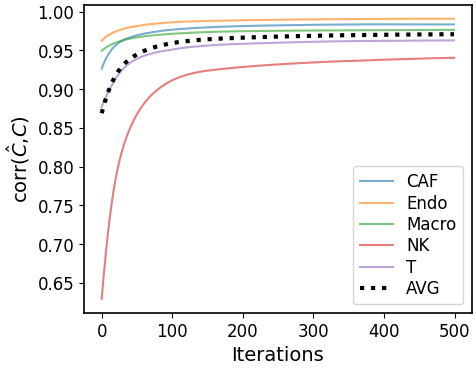

In [29]:
model_DTD = deconomix.methods.DTD(X_ref, Y_mat, C_mat)
model_DTD.run(iterations = 500, plot = True)

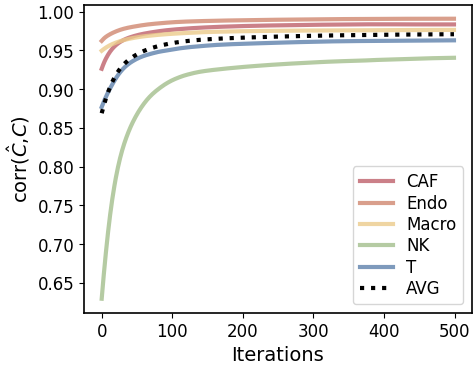

In [30]:
plt.figure()
#plt.axhline(y=1, alpha=0.3, c='gray')
#plt.title("Training Progress Overview")
plt.ylabel("corr($\hat{C}$,$C$)")
plt.xlabel("Iterations")
colors = ['#d8dee9','#bf616a', '#d08770', '#ebcb8b', '#a3be8c', '#5e81ac']
for i in range(X_ref.shape[1]):
    plt.plot(model_DTD.all_corr[:,i],color = colors[i+1], label = model_DTD.celltypes[i], alpha=0.8, lw=3)
plt.plot(model_DTD.mean_corr, color="black", label="AVG", ls = "dotted", lw=3)

plt.legend(loc='lower right', labelspacing = 0.2)
plt.savefig('plots_appnote/pdf/training_overview.pdf')
plt.show()

### Visualization of gene weighting vs no weighting for a small cell type

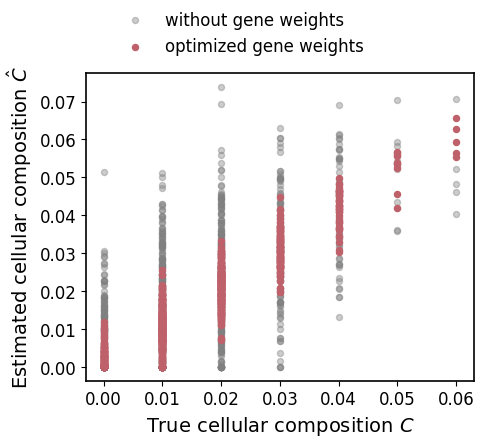

In [21]:
C_est = deconomix.utils.calculate_estimated_composition(X_ref, Y_mat, model_DTD.gamma)
gamma_naive = pd.Series(np.ones(1000))
gamma_naive.index = model_DTD.gamma.index
C_est_naive = deconomix.utils.calculate_estimated_composition(X_ref, Y_mat, gamma_naive)

plt.scatter(C_mat.loc["NK",:], C_est_naive.loc["NK",:], color="gray", alpha=0.4, s=19, label="without gene weights")
plt.scatter(C_mat.loc["NK",:], C_est.loc["NK",:], color="#bf616a", alpha=1, s=19, label= "optimized gene weights")
plt.xlabel("True cellular composition $C$")
plt.ylabel("Estimated cellular composition $\\hat{C}$")
#plt.title("Composition estimation for NK cells on training data")
plt.legend(loc='upper center', bbox_to_anchor=(0.40, 1.25), frameon=False, ncol=1)
plt.savefig("plots_appnote/pdf/geneweights_vs_naive_NK_training.pdf")
plt.savefig("plots_appnote/png/geneweights_vs_naive_NK_training.png")


### Visualization of a possible cellular composition estimate

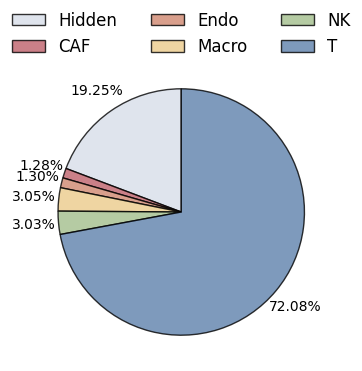

In [18]:
cell_types = list(C_test.index)
cell_types[0] = "Hidden"
values = C_test.mean(axis=1)

# Define colors (using grey for 'Hidden')
#colors = ['grey','C0', 'C1', 'C2', 'C3', 'C4' ]
colors = ['#d8dee9','#bf616a', '#d08770', '#ebcb8b', '#a3be8c', '#5e81ac']


# Create the pie chart (smaller pie: radius < 1 removes illusion of a hole)
plt.figure(figsize=(5,4))

# Move the labels further out using the 'labeldistance' parameter (> 1 is further out)
# Here we use labeldistance=1.3 instead of the default 1.1
wedges, texts, autotexts = plt.pie(
    values,
    labels=["","","","","",""], 
    colors=colors,
    startangle=90,
    wedgeprops = {
        "edgecolor" : "black", 
        'linewidth': 1, 
        'antialiased': True,
        'alpha': 0.8
    },
    explode=[0,0,0,0,0,0],
    pctdistance=1.2,
    autopct='%1.2f%%',
)

# Set smaller fontsize for the autopct labels
for autotext in autotexts:
    autotext.set_fontsize(10)

# Legend on top, no frame
plt.legend(
    wedges,
    cell_types,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.20),
    ncol=3,
    frameon=False
)

plt.savefig('plots_appnote/pdf/C_hat_piechart.pdf')
plt.savefig('plots_appnote/png/C_hat_piechart.png')


# Display the chart

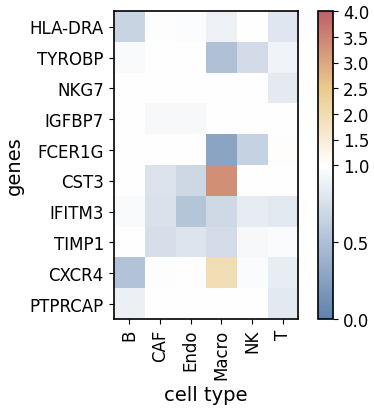

In [13]:
from matplotlib.colors import CenteredNorm, TwoSlopeNorm, LinearSegmentedColormap
Delta_est = pd.read_pickle("Delta_est2.pkl")
#regulated_genes = ['CXCR4', 'CD3D', 'FTH1', 'PTPRCAP', 'IL32', 'SRGN', 'PTPRC']

norm = TwoSlopeNorm(vmin=0.0, vcenter=1, vmax=4.0)
cmap = LinearSegmentedColormap.from_list(
    "blue_white_orange",
    [
        (0.0, "#5e81ac"),     # color at value 0 (absolute, not relative minimum)
        (0.5, "white"),
        (0.75, '#ebcb8b'),
        (1, "#bf616a")    # maximum value
    ]
)
plt.figure()
plt.imshow(Delta_est.iloc[0:10,:], cmap=cmap, norm=norm)
plt.yticks(ticks=range(0,10), labels=Delta_est.index[0:10], rotation=0);
plt.xticks(ticks=range(0,6), labels=Delta_est.columns, rotation=90)
plt.xlabel("cell type")
plt.ylabel("genes")
#plt.title("Estimated Regulation Factors $\\Delta$")
plt.colorbar();
plt.savefig("plots_appnote/pdf/delta_heatmap.pdf")
plt.savefig("plots_appnote/png/delta_heatmap.png")

In [25]:
Delta_est.columns

Index(['B', 'CAF', 'Endo', 'Macro', 'NK', 'T'], dtype='object', name='Celltypes')